In [1]:
from scipy.stats import truncnorm
import pandas as pd
import numpy as onp
import itertools
import datetime
import tqdm
import sys
import os

import matplotlib.pyplot as plt

def flatten_list(list_array):
    return list(itertools.chain(*list_array))

sys.path.insert(0,"../")
from global_config import config

results_dir           = config.get_property('results_dir')
data_dir              = config.get_property('data_dir')
paper_dir             = config.get_property('paper_dir')
data_db_dir           = config.get_property('data_db_dir')
feb_hosp_records_path = os.path.join(data_db_dir, 'long_files_8_25_2021')
path_to_save          = os.path.join(results_dir, "real_testing", "community")


COLOR_LIST1 = ["#F8AFA8", "#FDDDA0", "#F5CDB4", "#74A089"]

In [2]:
def amro2cute(amro):
    if amro == 'ESCHERICHIA COLI':
        return "e_coli"
    elif amro == 'KLEBSIELLA PNEUMONIAE':
        return "k_pneumoniae"
    elif amro=="PSEUDOMONAS AERUGINOSA":
        return "p_aeruginosa"
    elif amro=="METHICILLIN-SUSCEPTIBLE STAPHYLOCOCCUS AUREUS":
        return "mssa"
    elif amro=="METHICILLIN-RESISTANT STAPHYLOCOCCUS AUREUS":
        return "mrsa"
    elif amro=="STAPHYLOCOCCUS EPIDERMIDIS":
        return "s_epidermidis"
    elif amro=="ENTEROCOCCUS FAECALIS":
        return "e_faecalis"
    elif amro=="ENTEROCOCCUS FAECIUM":
        return "e_faecium"

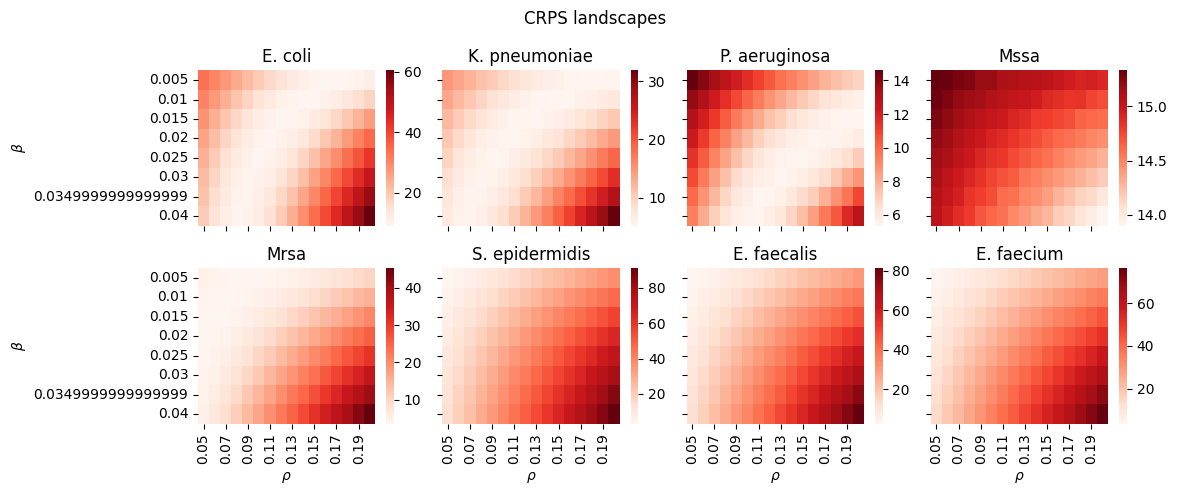

In [3]:
import seaborn as sns

amro_search = ['ESCHERICHIA COLI', 'KLEBSIELLA PNEUMONIAE', 'PSEUDOMONAS AERUGINOSA', 'METHICILLIN-SUSCEPTIBLE STAPHYLOCOCCUS AUREUS',
                'METHICILLIN-RESISTANT STAPHYLOCOCCUS AUREUS', 'STAPHYLOCOCCUS EPIDERMIDIS', 'ENTEROCOCCUS FAECALIS', 'ENTEROCOCCUS FAECIUM']


fig, ax = plt.subplots(2, 4, figsize=(12, 5), sharey=True, sharex=True)

for idx_axi, axi in enumerate(ax.flatten()):

    amro         = amro_search[idx_axi]
    crps_amro_df = pd.read_csv( os.path.join("..", "preliminary_results", f"crps_{amro2cute(amro)}.csv"), index_col=None).drop(columns=['Unnamed: 0'])
    crps_amro_df

    hm_crps_df = crps_amro_df.pivot(index='beta', columns='rho', values='crps')
    hm_cov_df  = crps_amro_df.pivot(index='beta', columns='rho', values='calibration_score')
    sns.heatmap(ax=axi, data=hm_crps_df, cmap='Reds')
    axi.set_ylabel(None)
    axi.set_xlabel(None)

    axi.set_title(". ".join(amro2cute(amro).split("_")).capitalize())

ax[0, 0].set_ylabel(r'$\beta$')
ax[1, 0].set_ylabel(r'$\beta$')

for i in range(4):
    ax[1, i].set_xlabel(r'$\rho$')

fig.suptitle("CRPS landscapes")
plt.tight_layout()

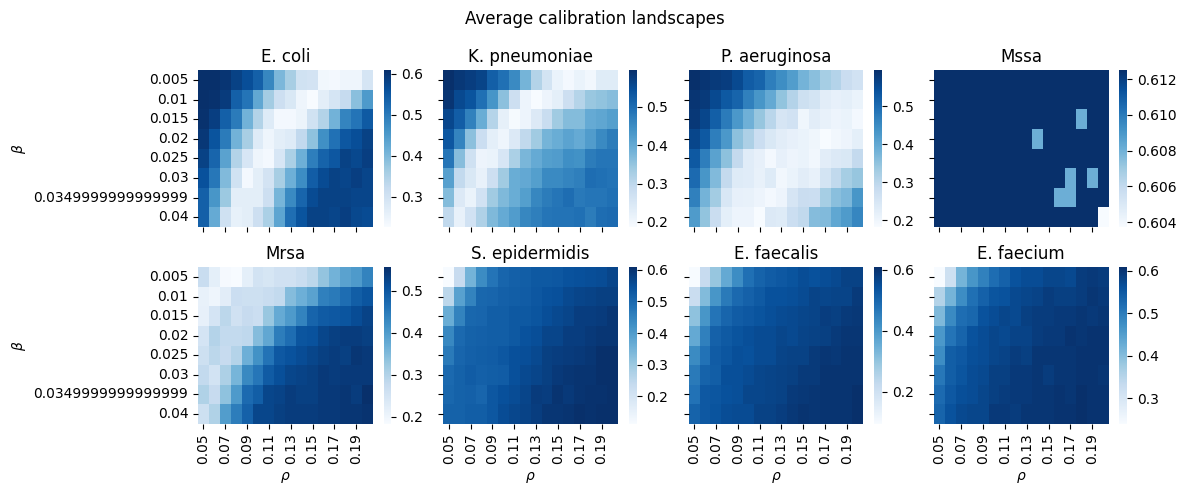

In [4]:
import seaborn as sns

amro_search = ['ESCHERICHIA COLI', 'KLEBSIELLA PNEUMONIAE', 'PSEUDOMONAS AERUGINOSA', 'METHICILLIN-SUSCEPTIBLE STAPHYLOCOCCUS AUREUS',
                'METHICILLIN-RESISTANT STAPHYLOCOCCUS AUREUS', 'STAPHYLOCOCCUS EPIDERMIDIS', 'ENTEROCOCCUS FAECALIS', 'ENTEROCOCCUS FAECIUM']


fig, ax = plt.subplots(2, 4, figsize=(12, 5), sharey=True, sharex=True)

for idx_axi, axi in enumerate(ax.flatten()):

    amro         = amro_search[idx_axi]
    crps_amro_df = pd.read_csv( os.path.join("..", "preliminary_results", f"crps_{amro2cute(amro)}.csv"), index_col=None).drop(columns=['Unnamed: 0'])
    crps_amro_df

    hm_cov_df  = crps_amro_df.pivot(index='beta', columns='rho', values='calibration_score')
    sns.heatmap(ax=axi, data=hm_cov_df, cmap='Blues')
    axi.set_ylabel(None)
    axi.set_xlabel(None)

    axi.set_title(". ".join(amro2cute(amro).split("_")).capitalize())

ax[0, 0].set_ylabel(r'$\beta$')
ax[1, 0].set_ylabel(r'$\beta$')

for i in range(4):
    ax[1, i].set_xlabel(r'$\rho$')

fig.suptitle("Average calibration landscapes")
plt.tight_layout()


In [5]:
previous_search = crps_amro_df.copy()
beta_done       = previous_search["beta"].unique()
rho_done        = previous_search["rho"].unique()

rho_search      = onp.arange(0.02, 0.2, 0.01)
beta_search     = onp.arange(0.005, 0.06 + 0.001, 0.005)

beta_search1 = onp.setdiff1d(beta_search, beta_done)
rho_search   = onp.setdiff1d(rho_search, rho_done)